  # Red Wine Quality 

Vinho tinto é uma bebida resultante da fermentação do suco ou mostro extraído de uvas pretas ou tintas.

Neste notebook iremos visualizar graficamente seus aspectos fisico-químicos, bem como analisar através de modelos de machine learning suas relações.

In [0]:
#Importando Bibliotecas
%matplotlib inline
import pandas as pd #Biblioteca para importação de DataFrames
import numpy as np #algebra
import seaborn as sns #graficos mais atraentes
import matplotlib.pyplot as plt #plotagem
import random #seleção de valores aleatórios para plotagem

In [73]:
#Biblioteca para importação de Dados do Google Drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Primeiramente iremos importar o arquivo csv a ser estudado

In [74]:
#Importando arquivo CSV
url = '/content/drive/My Drive/Colab Notebooks/WINE QUALITY/DATA_ARCHIVE/winequality-red.csv'

wine = pd.read_csv(url)
wine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Após o contato inicial com nossos dados, é necessário ser conhecer cada campo da tabela. Para isso será criado um dicionário de dados explicitando o nome da variável e seu real significado.

## Dicionário de Dados

| Variável             	| Definição                                                                                                                                             	|
|----------------------	|-------------------------------------------------------------------------------------------------------------------------------------------------------	|
| fixed acidity        	| Ácidos envolvidos na fabricação do vinho,<br>fixos ou não voláteis;                                                                                   	|
| volatile acidity     	| Quantidade de ácido acético no vinho, que<br>em grandes concentrações pode levar ao desagradável<br>sabor de vinagre;                                 	|
| citric acid          	| Encontrado em pequenas quantidades, o ácido cítrico <br>pode adicionar "frescor" e sabor aos vinhos;                                                  	|
| residual sugar       	| Açúcar residual da fermentação, é raro encontrar<br>vinhos com menos de 1 grama/litro e vinhos com mais<br>de 45 gramas/litro são considerados doces; 	|
| chlorides            	| A quantidade de sal no vinho;                                                                                                                         	|
| free sulfur dioxide  	| SO2, impede o crescimento microbiano e a oxidação <br>do vinho;                                                                                       	|
| total sulfur dioxide 	| Quantidade de SO2 livre e ligadas, em baixas concetrações<br>ele é indetectável, mas em altas se torna evidente<br>no sabor e no aroma do vinho;      	|
| density              	| A densidade de água do vinho;                                                                                                                         	|
| pH                   	| Descreve o quão ácido, ou o quão básico é o vinho<br>em uma escala de 0 à 14;                                                                         	|
| sulphates            	| Aditivos, podem contribuir para aumentar o nível de SO2;                                                                                              	|
| alcohol              	| A porcentagem de álcool contida no vinho;                                                                                                             	|
| quality              	| Qualidade do vinho, em uma escala de 0 à 10;                                                                                                          	|

## Visualização dos Dados

In [75]:
#Informação sobre as colunas do Dataframe
wine.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0

Agora que conhecemos os dados, armazenados em cada coluna do dataframe, iremos buscar por valores nulos. Caso eles sejam encontrados eles serão tratados, caso não haja ocorrências iremos visualizar graficamente a relação entre os dados.

In [76]:
#Verifica se existe alguma ocorrência de dados nulos na tabela
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [0]:
#Função Para Realização de Multi-plots de gráficos usando a Biblioteca Seanborn
def multiplot(dataset, rows, cols, plot_type):
   
   #
   column_names=dataset.columns.values

   #
   number_of_column=len(column_names)

   #
   fig, axarr=plt.subplots(rows,cols, figsize=(20,14))

   #
   counter = 0

   for i in range(rows):
     for j in range(cols):

       if 'violin' in plot_type:
         sns.violinplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j])
       elif 'box'in plot_type :
          sns.boxplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j])
       elif 'point' in plot_type:
           sns.pointplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j])
       elif 'bar' in plot_type:
            sns.barplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j])
        
       counter+=1
       if counter==(number_of_column-1,):
         break

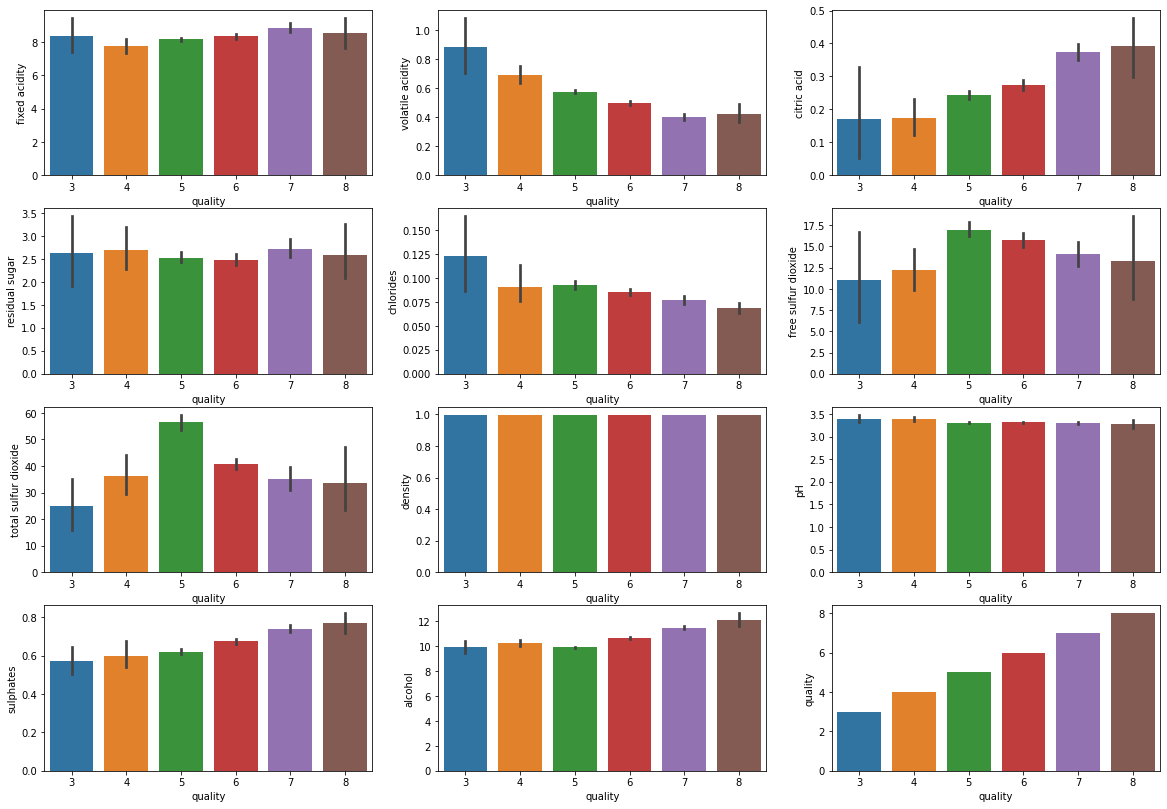

In [78]:
multiplot(wine,4,3,'bar')

## Métodos de Machine Learning